# Домашнее задание 2: Линейные модели. Работа с признаками

## Импорт библиотек и загрузка данных

In [23]:
RANDOM_STATE = 42
TEST_SIZE = 0.3

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [25]:
DIAMONDS = 'https://raw.githubusercontent.com/evgpat/datasets/main/diamonds.csv'

In [26]:
data = pd.read_csv(DIAMONDS)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
data.shape

(53940, 11)

Посмотрим на типы столбцов

In [28]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание

Есть ли в наборе данных пропущенные значения? Если да, удалите строки с ними.

Также выведите на экран число пропусков в каждом столбце.

In [29]:
# ваш код здесь
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование)

In [32]:
# ваш код здесь
data.drop(['Unnamed: 0'], axis = 1, inplace =True)
#Очевидно, что эта колонка не несла никакой полезной информации

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [43]:
# ваш код здесь
# import matplotlib.pyplot as plt
# 
# plt.matshow(data.corr())
# plt.show()
# data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
data.select_dtypes(exclude='object').corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

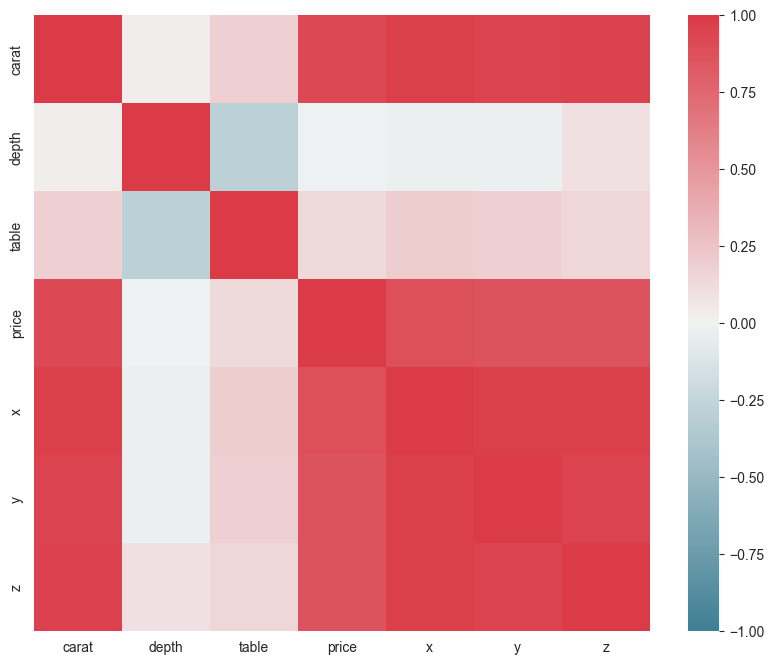

In [44]:
import matplotlib.pyplot as pl

import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = data.select_dtypes(exclude='object').corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Целевая переменная price имеет значительную степерь корреляции с 4 признаками - carat, x, y, z.

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) или `sklearn.OneHotEncoder`). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

In [47]:
cat_columns = data.select_dtypes(include='object').columns
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [48]:
from DataFrameOneHotEncoder import DataFrameOneHotEncoder
# ваш код здесь
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

encoded_df = pd.DataFrame(enc.fit_transform(data[cat_columns]). toarray ())
encoded_df.columns = enc.get_feature_names_out()
df = data.join (encoded_df)
df


,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
df.drop(cat_columns, axis= 1 , inplace= True )

In [50]:
df.head(3)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`.  
Также создайте вектор `y`, содержащий целевую переменную `price`.

In [51]:
# ваш код здесь
y = df.price
X = df.drop(['price'], axis=1)


Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`

При разбиении укажите `random_state = 42`

In [53]:
# ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size = TEST_SIZE)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему

In [54]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках

In [55]:
# ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train_scaled, y_train) #обучаем на тренировочных данных

predicted_on_test = model.predict(X_test_scaled) #предсказываем на отложенной выборке
predicted_on_train = model.predict(X_train_scaled) #предсказываем на тренировочных данных

print("Test r2_score = %.4f" % r2_score(y_test, predicted_on_test))
print("Train r2_score = %.4f" % r2_score(y_train, predicted_on_train))


Test r2_score = 0.9202
Train r2_score = 0.9196


### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных

In [19]:
# ваш код здесь
model.coef_


array([ 5.33960136e+03, -9.01659327e+01, -6.04214567e+01, -1.09995413e+03,
       -7.11294685e+00, -3.47695261e+01, -1.00112927e+14, -1.68830350e+14,
       -2.88587731e+14, -2.57049069e+14, -2.46305181e+14,  3.11946315e+14,
        3.63337610e+14,  3.60692968e+14,  3.82392014e+14,  3.41757943e+14,
        2.82809687e+14,  2.09555151e+14,  1.40936873e+14,  2.17643233e+14,
        5.22951419e+14,  4.56398910e+14,  4.36572320e+14,  5.10261328e+14,
        3.06616705e+14,  3.53737031e+14])

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие.  

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [20]:
# ваш код здесь
X_train2 = X_train.drop(['x', 'y', 'z'], axis= 1)
X_test2 = X_test.drop(['x', 'y', 'z'], axis= 1)

In [21]:
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

model2 = LinearRegression()

model2.fit(X_train2_scaled, y_train) #обучаем на тренировочных данных после удаления x, y, z

predicted_on_test2 = model2.predict(X_test2_scaled) #предсказываем на отложенной выборке после удаления x, y, z
predicted_on_train2 = model2.predict(X_train2_scaled) #предсказываем на тренировочных данных после удаления x, y, z

print("Test r2_score = %.4f" % r2_score(y_test, predicted_on_test2))
print("Train r2_score = %.4f" % r2_score(y_train, predicted_on_train2))

Test r2_score = 0.9162
Train r2_score = 0.9160


### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [22]:
# ваш код здесь
## что если смержить с другим датасетом? например, с этим - https://www.kaggle.com/datasets/miguelcorraljr/brilliant-diamonds
### но интересно, по какому индексу это сделать. По цене, по карат, по комбинации индексов (цена+карат+цвет+огранка). То есть надо найти корректный key

####генерирование новых признаков - какие main и best practices?

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

In [23]:
# ваш код здесь
...